
# Capstone Project
## Battle of the Neighborhoods
### __To find the most suitable Borough in New York city to open an Indian Cuisine Restaurant__
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### __Introduction__

According to Mr. Anshu Dua, founder and chief executive officer of The Chaat Co., New York _"Indian cuisine has been underrepresented in the U.S. market for quite some time. Most Americans experience Indian food in poorly branded, Taj Mahal-themed restaurants with all-you-can-eat buffets featuring mysterious curries, rice and naan. While delicious, that experience hasn’t evolved in most cities for at least the past 30 years."As per Washingto Post report,there are, more than 40,000 Chinese restaurants around the country, and roughly the same number of Mexican restaurants, but only about 5,000 Indian restaurants.According to Krishnendu Ray, a professor at New York Univeristy who has been studying the cuisine's rise for more than a decade the Indian cuisine is  the next "ethnic food trend." There are about 2.7 million Indians in the U.S. -- about half a million in New York City.

One of the advantages of opening up new Indian cuisine restaurant is that a substantial number of Indian Immigrants are professionals. About 30 percent to 50 percent of Indian immigrants have substantial cultural capital, and many are Anglophones. The prestige of Indian immigrants gets linked to prestige of Indian food. Though, of course, there are also Indians in less professional fields but most of them being proffesional they have more then enough purchasing power if they have suitable option for original ethnic Indian Food. 


### Business Problem

In this project, I want to help my client to find the best borough in New York City to open an Indian Cuisine Restaurant. The challenge is to find a suitable neighborhood which is close enough to some amenities and venues, has fewer competitors, and of course is affordable to rent. An ideal location should be one where there is highest concentration of Indian Americans and should also be near a place where many people visit such as near a cinema, park, garden, playground, and theater.  

For this project, I am going to create a simple guide on where to eat based on Foursquare likes, restaurant category and geographic location data for indian restaurants in New York city.  Then I will find Indian restaurants per borough and then highest number of Indian Americans per borough. Then I will try to extract the information on which borough has lowest number of restaurants per population, so that my new venture would have minimium competition and maximum market potential. 

### __Problem Statement__

1.	Which is the best rated Indian cuisine restaurant in New York City?
2.	In what Neighborhood or borough should I open an Indian cuisine restaurant to have the best chance of being successful?


### Target Audience

* Business personnel who wants to invest or open an Indian restaurant in NY. This analysis will be a guide to start Indian restaurants targeting the Indian Americans.
* Freelancer who loves to have their own restaurant as a side business. 
* Indian origin person who wants to move in the neighborhoods with lots of option for Indian restaurants in NY.
* Business Analyst or Data Scientists, who wish to analyze the neighborhoods of NY using Exploratory Data Analysis 

### __Data__
In order to answer the above questions, data on New York City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

>New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

>Data of Indian Americans living in New York city is scraped from https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region

All data related to locations and quality of Indian restaurants will be obtained via the FourSquare API utilized via the Request library in Python.


### __Methodology__

* Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

* Wikipedia webpage has been scraped using urllib and BeautifulSoup libraries. 

* FourSquare be used to locate all venues and then filtered by Indian restaurants.  Ratings, tips, and likes by users will be counted and added to the dataframe.

* Data will be sorted based on rankings

* Finally, the data be will be visually assessed using graphing from various Python libraries.

### Analysis

In [142]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [11]:
CLIENT_ID = 'EOMFJXAPKF2TZEMERARFL1ZH0WEDMCGPYG0JPLLU0QJ10STM' # your Foursquare ID
CLIENT_SECRET = 'UY0CW4KF4TP4T3V1QQECYMOXJXUET52DKYAGF14WKM0GJR1C' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EOMFJXAPKF2TZEMERARFL1ZH0WEDMCGPYG0JPLLU0QJ10STM
CLIENT_SECRET:UY0CW4KF4TP4T3V1QQECYMOXJXUET52DKYAGF14WKM0GJR1C


In [23]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [24]:
search_query = 'Indian Restaurants'
radius = 400
print(search_query + ' .... OK!')

Indian Restaurants .... OK!


In [25]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=EOMFJXAPKF2TZEMERARFL1ZH0WEDMCGPYG0JPLLU0QJ10STM&client_secret=UY0CW4KF4TP4T3V1QQECYMOXJXUET52DKYAGF14WKM0GJR1C&ll=40.7127281,-74.0060152&v=20180604&query=Indian Restaurants&radius=400&limit=100'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee548f5e6573d7f9e7ba5b6'},
 'response': {'venues': [{'id': '5072fe2eb0ed0fcce2497f30',
    'name': 'Indian Biryani Delights (Cart)',
    'location': {'address': 'Water St',
     'crossStreet': 'btwn Maiden Lane & Pine St',
     'lat': 40.71316451366987,
     'lng': -74.01021890317702,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.71316451366987,
       'lng': -74.01021890317702}],
     'distance': 358,
     'postalCode': '10005',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['Water St (btwn Maiden Lane & Pine St)',
      'New York, NY 10005',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1cb941735',
      'name': 'Food Truck',
      'pluralName': 'Food Trucks',
      'shortName': 'Food Truck',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
       'suffix': '.png'},
      'primary': True}],
    'referra

In [27]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\ctpat\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,5072fe2eb0ed0fcce2497f30,Indian Biryani Delights (Cart),"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1592084761,False,Water St,btwn Maiden Lane & Pine St,40.713165,-74.010219,"[{'label': 'display', 'lat': 40.71316451366987...",...,NY,United States,"[Water St (btwn Maiden Lane & Pine St), New Yo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,510aad1ae4b0bfb2583169b9,A Saffron Thread Fresh Indian,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1592084761,False,98 Chambers St,at Church St,40.714823,-74.007689,"[{'label': 'display', 'lat': 40.71482256030567...",...,NY,United States,"[98 Chambers St (at Church St), New York, NY 1...",275521,https://www.seamless.com/menu/a-saffron-thread...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,432263795
2,4a948b83f964a520f32120e3,Indian Express,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1592084761,False,18 Murray St,Church St.,40.713413,-74.008469,"[{'label': 'display', 'lat': 40.71341323852539...",...,NY,United States,"[18 Murray St (Church St.), New York, NY 10007...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,574eab2a498e3f5530cfdbca,Indian Beautiful Art (IBA) Crafts PVT Ltd,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",v-1592084761,False,100 Church St,NaN,40.712281,-74.010129,"[{'label': 'display', 'lat': 40.71228057311295...",...,NY,United States,"[100 Church St, New York, NY 10007, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,574e8ba2cd10da9c722374fb,Indian Beautiful Art (IBA) Crafts PVT Ltd,"[{'id': '4bf58dd8d48988d1f4941735', 'name': 'D...",v-1592084761,False,100 Church St,NaN,40.716135,-74.006610,"[{'label': 'display', 'lat': 40.71613521878094...",...,NY,United States,"[100 Church St, New York, NY 10007, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [143]:
pip install nbconvert

In [30]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [31]:
ny_data.shape

(306, 4)

In [33]:
from bs4 import BeautifulSoup
import os
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Done!


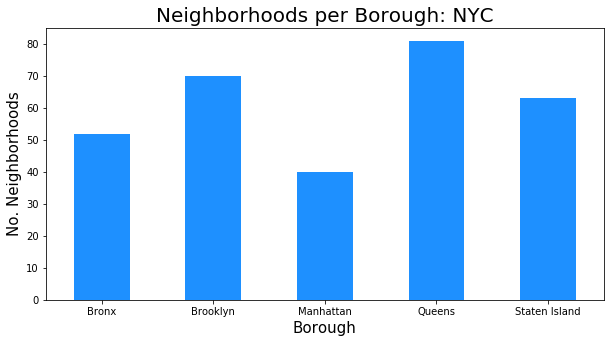

In [34]:
clr = "dodgerblue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [35]:
# queens has most neighborhoods
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(ny_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    print(row)
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
['Bronx', 'Norwood',

In [36]:
indian_rest_ny.to_csv('indian_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare

In [37]:
indian_rest_ny = pd.read_csv('indian_rest_ny_tocsv1.csv')
indian_rest_ny.tail()

,Unnamed: 0,Borough,Neighborhood,ID,Name
26,26,Staten Island,New Dorp,4be74a502468c928505a0243,Taste Of India II
27,27,Queens,Jamaica Hills,4c434b2bd691c9b6ef8f8f0a,Sagar Restaurant
28,28,Manhattan,Sutton Place,4a63bfb4f964a520b3c51fe3,Chola Eclectic Indian Cuisine
29,29,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux
30,30,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden


In [38]:
indian_rest_ny.shape

(31, 5)

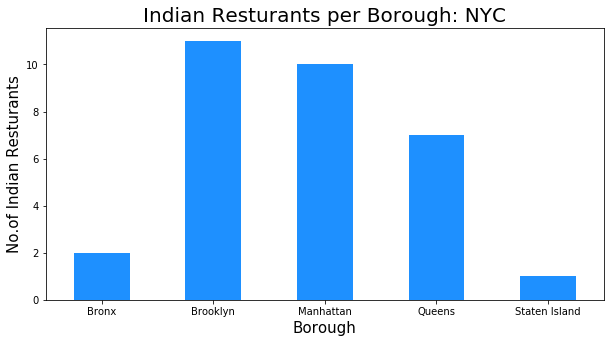

In [40]:
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Indian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

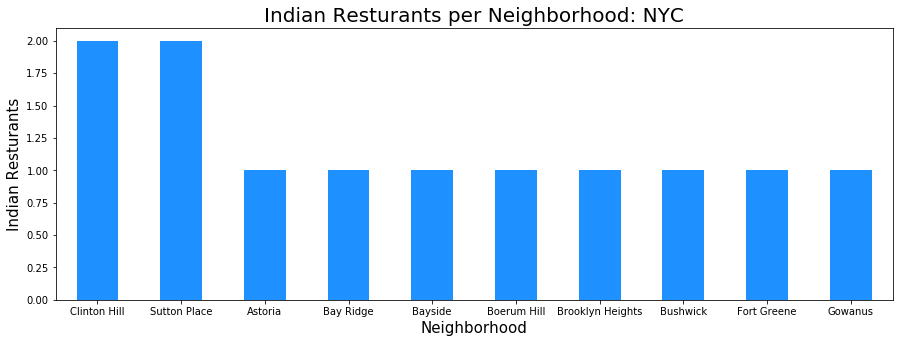

In [105]:
NOofNeigh = 10 
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(15,5), color=clr)
plt.title('Indian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [158]:
indian_rest_ny[indian_rest_ny['Borough']=='Queens']

,Unnamed: 0,Borough,Neighborhood,ID,Name
21,21,Queens,Astoria,5d8d9c5e0a2ffc0008f28855,The Gully
22,22,Queens,Kew Gardens,5782c9ce498edde587f5aa14,Tikka Indian Grill
23,23,Queens,Long Island City,50a287a7e4b0033f830f06db,Raj's Indian Kitchen
24,24,Queens,Rego Park,4b3a8aa5f964a520996925e3,Sajni 026
25,25,Queens,Bayside,4f1f4996e4b01ff351a7a50c,Ayna Agra Indian Restaurant
27,27,Queens,Jamaica Hills,4c434b2bd691c9b6ef8f8f0a,Sagar Restaurant
30,30,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden


In [57]:
column_names=['Borough', 'Neighborhood','ID','Name','Likes','Rating','Tips']

indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,id,name
    try:
        venue_details=get_venue_details(id)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',id)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5ee54df1dc59643ef4371742'}, 'response': {'venue': {'id': '4c48da9f3013a59356c5f0e1', 'name': 'Saffron Garden', 'contact': {'phone': '7184334449', 'formattedPhone': '(718) 433-4449'}, 'location': {'address': '46-11 Skillman Ave', 'crossStreet': 'btwn 46th and 47th', 'lat': 40.74655397129589, 'lng': -73.9177381667934, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74655397129589, 'lng': -73.9177381667934}], 'postalCode': '11104', 'cc': 'US', 'city': 'Sunnyside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['46-11 Skillman Ave (btwn 46th and 47th)', 'Sunnyside, NY 11104', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/saffron-garden/4c48da9f3013a59356c5f0e1', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': 

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
26,Staten Island,Fox Hills,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.7,16
27,Staten Island,Fox Hills,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.7,16
28,Staten Island,Fox Hills,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.7,16
29,Staten Island,Fox Hills,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.7,16
30,Staten Island,Fox Hills,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.7,16


In [58]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny_csv.csv') # I continue to save data to a .csv as I move through this project

In [59]:
indian_rest_stats_ny.shape

(31, 7)

In [60]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       31 non-null     object 
 1   Neighborhood  31 non-null     object 
 2   ID            31 non-null     object 
 3   Name          31 non-null     object 
 4   Likes         31 non-null     object 
 5   Rating        31 non-null     float64
 6   Tips          31 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.8+ KB


In [61]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       31 non-null     object 
 1   Neighborhood  31 non-null     object 
 2   ID            31 non-null     object 
 3   Name          31 non-null     object 
 4   Likes         31 non-null     float64
 5   Rating        31 non-null     float64
 6   Tips          31 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.8+ KB


In [63]:
indian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,31.0,3.100000e+01,31.0
mean,17.0,7.700000e+00,16.0
std,0.0,4.514300e-15,0.0
min,17.0,7.700000e+00,16.0
25%,17.0,7.700000e+00,16.0
50%,17.0,7.700000e+00,16.0
75%,17.0,7.700000e+00,16.0
max,17.0,7.700000e+00,16.0


In [64]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                    Staten Island
Neighborhood                   Fox Hills
ID              4c48da9f3013a59356c5f0e1
Name                      Saffron Garden
Likes                                 17
Rating                               7.7
Tips                                  16
Name: 0, dtype: object

In [65]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                    Staten Island
Neighborhood                   Fox Hills
ID              4c48da9f3013a59356c5f0e1
Name                      Saffron Garden
Likes                                 17
Rating                               7.7
Tips                                  16
Name: 0, dtype: object

In [107]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
0,Fox Hills,7.7


In [67]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Staten Island,7.7


In [86]:
# import the library we use to open URLs
import urllib.request


In [88]:
url='https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region'
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [89]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Indians in the New York City metropolitan region - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"20d67623-05a4-4cb9-a799-7701e0a9c011","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Indians_in_the_New_York_City_metropolitan_region","wgTitle":"Indians in the New York City metropolitan region","wgCurRevisionId":962531941,"wgRevisionId":962531941,"wgArticleId":44837185,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","Webarchiv

In [90]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")
all_tables

[<table class="vertical-navbox nowraplinks" style="float:right;clear:right;width:22.0em;margin:0 0 1.0em 1.0em;background:#f8f9fa;border:1px solid #aaa;padding:0.2em;border-spacing:0.4em 0;text-align:center;line-height:1.4em;font-size:88%;width: auto;"><tbody><tr><td class="navbox-title" style="padding-top:0.4em;line-height:1.2em;font-size:100%">Part of a series on</td></tr><tr><th class="navbox-title" style="padding:0.2em 0.4em 0.2em;padding-top:0;font-size:145%;line-height:1.2em;font-size: 130%"><a href="/wiki/Demographics_of_New_York_City#Ethnicities" title="Demographics of New York City">Ethnicity in New York City</a></th></tr><tr><td style="padding:0 0.1em 0.4em">
 <div class="NavFrame collapsed" style="border:none;padding:0"><div class="NavHead" style="font-size:105%;background:transparent;text-align:left;background:transparent;border-top:1px solid #aaa;text-align:center;">Ethnicities</div><div class="NavContent hlist" style="font-size:105%;padding:0.2em 0 0.4em;text-align:center

In [91]:
#we will find th table we need and extract it
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Borough
</th>
<th>City
</th>
<th>Indian Americans
</th>
<th>Density of Indian Americans per square mile
</th>
<th>Percentage of Indian Americans in municipality's population
</th></tr>
<tr>
<td align="center">1
</td>
<td><a href="/wiki/Queens" title="Queens">Queens</a> (2014)<sup class="reference" id="cite_ref-QueensIndians_33-0"><a href="#cite_note-QueensIndians-33">[33]</a></sup>
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City</a>
</td>
<td align="right"><span data-sort-value="7005144896000000000♠">144,896</span>
</td>
<td align="center"><span data-sort-value="7003132650000000000♠">1,326.5</span>
</td>
<td align="center"><span data-sort-value="7000620000000000000♠">6.2</span>
</td></tr>
<tr>
<td align="center">2
</td>
<td><a href="/wiki/Brooklyn" title="Brooklyn">Brooklyn</a> (2012)
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City</a>
</td>
<td align="right"><span 

In [92]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[] 

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))

In [97]:
import pandas as pd
df=pd.DataFrame(A,columns=['Rank'])
df['Borough']=B
df['City']=C
df['Indian_Americans']=D
df['Density_per_square_mile']=E
df['Percentage_in_municipality\'s_population']=F
df

,Rank,Borough,City,Indian_Americans,Density_per_square_mile,Percentage_in_municipality's_population
0,1\n,Queens,New York City,"144,896","1,326.5",6.2
1,2\n,Brooklyn,New York City,"25,270",357.9,1.0
2,3\n,Manhattan,New York City,"24,359","1,060.9",1.5
3,4\n,The Bronx,New York City,"16,748",398.6,1.2
4,5\n,Staten Island,New York City,"6,646",113.6,1.4
5,\n,Total (2014),New York City,"227,994",753.4,2.7


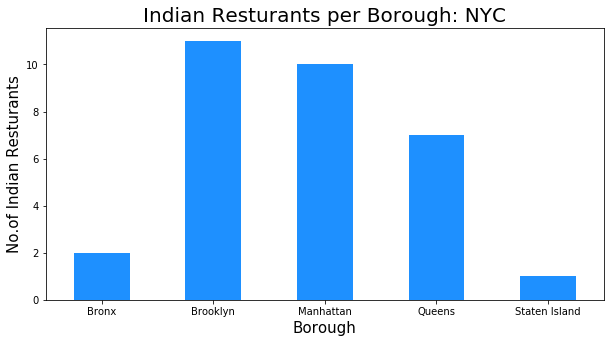

There are 7 Indian Restaurants in Queens Borough as per FourSquare Data


In [103]:
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Indian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()
print('There are 7 Indian Restaurants in Queens Borough as per FourSquare Data')

In [129]:
Population = 144896
Number_of_indian_restaurants=7 
Restaurant_Density = Population / Number_of_indian_restaurants

print (Restaurant_Density)

20699.428571428572


### __Results and Discussion__
Brooklyn and Queens have the best rated Indian restaurants on average. The best rated Indian Resturant with 7.7 rating out of 10 is Saffron Garden sittuated at Staten Island. From the bar graph we checked that there are highest number of neighbourhood in Queens Borough and also same borough has the maximum number of Indian cuisine resturants. From the webscrapped wikipedia data we know that there are 227994 Indian Origin people plus there are many Indian origin International students in the New York city. Out of these 227994 Indian Americans 144896 people live in Queens borough which is more than half of the total population. Now, from Foursquare API we know that there are 7 Indian Cuisine Restaurants in the Queens borough, so by simple back of the envelope calculation shows that each of these 7 restaurants caters the need of almost 21000 people, which shows ample opportunities for a new decent Indian cuisine restaurant in the borough. So, based on the above anaysis I would prefer to open my Indain Cuisine Restaurant in Queens borough in New York city.  

### __Conclusion__

There is ample opportunity for ethnic food industry in this cosmopolitan and multicultural city of New York. Based on the data anaysis I would suggest opening an Indian Resturant in Queens borough as there is still unexplored market and huge market potential.